In [1]:
# importing function from a different ipny 
from ipynb.fs.full.dataset import spam_test_train_set
from ipynb.fs.full.dataset import confusion
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from functools import reduce
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)
pd.options.display.max_columns = 1000
#https://machinelearningmastery.com/deep-learning-bag-of-words-model-sentiment-analysis/

In [2]:
[train_email, test_email] = spam_test_train_set()
emails = pd.concat([train_email, test_email])

2018-12-25 06:41:44,133   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from anderson.doramail.com 207.12.141.100 by coliform.funmail.co.uk InterMail vK.4.04.00.00 658-589-341 license 893694jz34ml9wal1qv276h1o63n3u76 with ESMTP id <20034613789721.SXCH195.coliform@anderson.doramail.com> for <kruscit@enron.com>; Sun, 5 Aug 2001 20:34:59 -0600 Received: from Matthew 206.81.96.2 by anderson.doramail.com iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0OMZ008USAR04O@anderson.doramail.com> for kruscit@enron.com; Sun, 5 Aug 2001 23:34:59 -0300 IDT
2018-12-25 06:41:44,493   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from anderson.doramail.com 207

In [3]:
train_email.head()

,Body,Date,From,To,isspam,message_id,path,subject
4,Carolina Power & Light and Florida Power Corpo...,2001-08-05 18:34:50,"[(Scott, Susan, Susan.Scott@ENRON.com)]","[(Acevedo, Rudy, Rudy.Acevedo@ENRON.com), (Car...",1,<902B8E00B151D44C98CA48BDD4BEA3F5082C01@NAHOU-...,trec05p-1/data/020/051,CP&L tariff changes (ER01-1807)
5,"All,\n\nAttached is the latest version of IM. ...",2001-08-06 09:57:04,"[(Myung, Jinsung, Jinsung.Myung@ENRON.com)]","[(Jacoby, Ben, Ben.Jacoby@ENRON.com), (Zisman,...",1,<0A7B6AF19330BD4EB9A7E73567E1374DBA9671@NAHOU-...,trec05p-1/data/020/202,IM draft - Florida Projects
15,,2001-08-06 16:32:16,"[(Brian O'Connell, prohelp@venturewire.com)]","[(, jdasovic@ENRON.COM)]",1,<200108061637.f76GbxU24931@mailman.enron.com>,trec05p-1/data/020/290,News About Your VentureWire Subscription
20,Please see attached.,2001-08-06 16:04:54,"[(Vakharia, Adarsh, Adarsh.Vakharia@ENRON.com)]","[(Beck, Sally, Sally.Beck@ENRON.com), (Buy, Ri...",1,<64D62EA5C2ADE6469F21F0D9471FBFD81F1690@NAHOU-...,trec05p-1/data/020/278,8/3/01 MPR
47,NESA/HEA is headed to Dallas! Whether you liv...,2001-08-06 15:50:59,"[(Teresa Knight, Teresa.Knight@nesanet.org)]",[],1,<65CAB38B2243D511B66F000103C11EFB02B0E4@mail.n...,trec05p-1/data/020/274,TRRC Chairman MICHAEL WILLIAMS and Land Commis...


In [19]:
## New code 
def iter_spacy(strs, tokenizer):
    words = []
    for s in strs:
        #doc = nlp(s)
        doc = tokenizer(s)
        tokens = [str(token) for token in doc]
        counts = collections.Counter(tokens)
        yield counts

In [20]:
bows_spacy = pd.DataFrame(iter_spacy(emails.subject, tokenizer )).fillna(0).astype(int)

In [21]:
bows_spacy.head(5)

,,,,,,,,,,!,!!,!!.,!!nprr,!One,!r7,!ְ,"""","""Chris.Stokley@enron.com""","""Daily","""H0me","""Live","""Re:","""Strategy""","""biggest""","""little","""ȸڰ""ڷ^^",#19,#38;,$,$$$,$$濭ǳ$$ȸϸ,$1,$1.49,$15-$99..,$20,$249.99,$275,$60...abadad,$60...alimahon,$60...arpine,$60...ikramul,$65,$75,$80....abdelkader,$80....alme,$99,$avings,%,&,&amp;,'01,'em,'uincey,(,"(""EESI"")","(""EPMI"")",(&#44305)Ű,(&#44305)̾Ʈ-30,(((Ưõ)))ī,(()),(),()ִ,(0.7%),(0.8%)%,(01-406),(01-409),(01-411),(1,(1000,(17,(19,"(6,500)","(BHall,",(Backhaul),"(Cia1is),",(ClearStation),(ER01-1807),(ER01-2327),(Full,(Incl.,(M),"(NNG,",(NOT),(Norman),(Number,(OTC:,(OTCBB:,(RP00-336),(Swap,(V13.2),(Violation/Notification,(and,(ialis,(if,(no,(ûȯ)@,(Ңͧ,),*,****,**CANCELED**,*-*-*-*-gїZ2@-*-*-*-*,*CANCELED,*EMCA*,*̷,+,+0000,+0100,+0300,",",",,,,",",,99%1",",Wichtig!!!",-,"-,-,@Mn黴dwpendant",--,"--gardening,",-.the_best_porn_site_in_the_net.-_now_with_webcams!.-,-0300,-0400,-0500,-0600,-0800,-ı-,-６千万円以下年収の方に大歓迎されています---論より証拠です。,.,..!!,...,....,...aivas,...atav,...̷δ..,.ڽŰ,/,///,/18/02,0.4%ݸ,0.7%,00:02:02,00:04:01,01/07/02,01/08/2002,01/09/2002,01/17/02,01/17/2002,01/18/2002,02,04:55:44,05:52:23,06,06/21/02,"07,",07/24/01,08/04/01,08/06/01,08/15/01,"09,",09/13/2001),096276,0RDER,0RIGINAL,0f,0n,0ppurtunities,1,1%,1-08-02.xls,1-18-02.xls,1-18-2002,1-8-2002,1-9,1-9-02,1-δ(/ݸ),1.29$,1.49$,1/10,1/10/02,1/16,1/17,1/17/01:,1/17/02,1/17/02:,1/17/2002,1/18/02,1/21,1/22,1/22/02,1/8/02,1/8/02;,1/9,1/9/02,1/9/02;,10,100%,100%!,100%Ⱑմϴ.,1000,1000s,10;,10K,10г,11-30,11-30-01,11/30,11/30/01,11:00,11;,12-2-01,12/31,12:14:03,"13,",14,14;,14th,14th!,15,1500,15:38:48,15;,16,"16,",16:10:42,16;,17,"17,",17;,18,"18,",1854,18:08:07,18;,18TJ-pvO@FAuWʱΫ~ק,1994,19;,1:30,1ȸ,2,20%,"2000(湮,","2000,",2001,2001+02,2002,2002!,"2002,",2002.xls,2003,2005,"2005-Vales,Pumps,Seals,Pipings,Fittings,Flow",20;,20г,20оȿ!@,"21,",21th,22,"22,","22-23,",2234,22;,"23,",23;,24;,24ð,25,27,27867,27997,282481,29,2:00,2;,2nd,3.25,30,300,3000,30г,"31,",3127B,31st,350,36,36һȯ,386794,39C1,3;,3rd,4,4-20-05,4.....,40%,401K,401k,4102,47088,4749153,4775,494403,4x2,5-10times,5.6,500%,501,5719,5;,5th,5õ,5õ!~,5г,6,6/20,6/25/02,6/602,611Ͻǽ,637,64%,64%-off,661292,68%-off,6;,6PM,6th,7,705512.1,75%,7556363,7:00,7;,7mV9,8,"8,",8-16-01,8/16/01,8/17/01,8/3/01,80%,840514,8:00,8;,8th,9,"9,",9-14-2001,9/14/01,90/110,92854570,9648078),99.99!!,9900,9;,:,:P:ntermin,":Soma:,",<<Concur,=,>>,?,?!!??!!?,??,@,@q吶yVт̑㏞z,A,A&M,A.M.,ACCOMMODATIONS,ACOMODAES,"AD00BE,","AD0BBE,",AD1PEX,"AD1PEX,",AEP,AGA,AGENT_,"AL11AS,","AL1AS,",ALL,AM,"AMB11EN,","AMB1EEN,",AND,AOL,APB,"APPLE,",APPROVE,APPROVED,ASAP!,ASME,ASSISTANCE,AT,ATC,ATM,ATTN:,AVAILABLE,AWAIT,AWARD,About,Accepted:,Access,Accessories,Account,Acquire,Action,Actions,Activities,Activity,Adaytum,Adjust,Administration,Advantage:,Advisory,Affairs,Affordable,Affrs,After,Against,Agency,Agenda,Aggressive,Agreement,Ahead,Airlines,Airways',Akamai,Alert,Alerting.,Algorithmics:,Alice,All,All-Nude,Allowance,Alternate,Alumni,Alumni:,Amended,Amendment,American,Americans,Americas,Ameritrade,An,Analyst,Ancillary,Andersen,Andrews,Anime,Announcement,Announces,Answer,Antigen,Antitrust,Antonio,Any,Anytime,Application,Applications,Appointment,Approval,Approves,April,Are,Arrangements,Article,As,Ass,Assignment,Associate,Asuwaneh,Attendees,Audit,Aug,Aug.,Aug16,August,Authorization,AutoReply:,Autobytel.com,Automation,"Autopsy""",Ava,Average,Avila,BACK,BBC,BC,BCAP,BCG,BEAR,BEST,"BNA,",BNP,BUSINESS,BY,Baja,Balance,Baltimore,Bank,Bankruptcy,Bar,Barnard,BarronsArti,...,taxes,tdwaterhouse_2000,tech,teens,telephone,tell,telling,terminated,tests,textbooks!,than,thank,that,the,their,them,themselves..are,then,these,they're,things,third,this,thought,through,time,time),time-ftx,time.,times,titles,tits,tmtgnzvnmmx,to,todd,told,tonight,too,top,top-quality,tori.kuykendall@enron.com,touch,track,trad,trade,transaction,transactions.,transfer,treasure,treat,tree,trial,trip|e,"true,",trying,ts,ttm,ttqjlpr,turbine,twnq,u,uacrypvkrsd,ufi,ug,"ulcers,",unbe

### Test-train split

In [22]:
bows_spacy_train = bows_spacy[:1600].values.reshape(1600,3647,1)
bows_spacy_test = bows_spacy[1600:].values.reshape(400,3647,1)
y_train= emails['isspam'][:1600].values
y_test= emails['isspam'][1600:].values

In [23]:
maxlen = 1
batch_size = 32
embedding_dims = 3647
filters = 250
kernel_size = 2
hidden_dims = 250
epochs = 30

In [32]:
import numpy as np
from keras.models import Model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, BatchNormalization
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPool1D, Flatten 
inp =  Input(shape=(embedding_dims, 1))
x = Conv1D(filters=1000, kernel_size=3, activation='relu',padding='valid', strides=1)(inp)
x = BatchNormalization(name='bn1_1')(x)
x = MaxPool1D(pool_size=3)(x)
x = Conv1D(filters=1000, kernel_size=3, activation='relu',padding='valid', strides=1)(x)
#dense1 = Dense(hidden_dims)(conv)
x = (Dropout(0.2))(x)
x = BatchNormalization(name='bn1_2')(x)
pool = MaxPool1D(pool_size=3)(x)
flat = Flatten()(pool)
dense = Dense(1)(flat)
activation = (Activation('sigmoid'))(dense)
model = Model(inp, activation)

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('boat_detector')
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_acc", mode="min", patience=10) 
callbacks_list = [checkpoint, early, reduceLROnPlat]

history = model.fit(bows_spacy_train, y_train,batch_size=batch_size, epochs=epochs, validation_data=(bows_spacy_test, y_test),\
         callbacks=callbacks_list)

/home/titli/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Train on 1600 samples, validate on 400 samples
Epoch 1/30
1600/1600 [==============================] - 837s 523ms/step - loss: 2.7809 - acc: 0.8194 - val_loss: 4.3008 - val_acc: 0.7250

Epoch 00001: val_loss improved from inf to 4.30078, saving model to boat_detector_weights.best.hdf5
Epoch 2/30
1600/1600 [==============================] - 833s 520ms/step - loss: 3.2485 - acc: 0.7950 - val_loss: 4.4773 - val_acc: 0.7125

Epoch 00002: val_loss did not improve from 4.30078
Epoch 3/30
1600/1600 [==============================] - 835s 522ms/step - loss: 3.0255 - acc: 0.8081 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00003: val_loss did not improve from 4.30078
Epoch 4/30
1600/1600 [==============================] - 834s 521ms/step - loss: 3.0748 - acc: 0.8056 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00004: val_loss did not improve from 4.30078
Epoch 5/30
1600/1600 [==============================] - 834s 521ms/step - loss: 2.7675 - acc: 0.8219 - val_loss: 7.9712 - val_acc: 0.5000

Epoch

In [36]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [65]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    sns.set(rc={"figure.figsize": (8, 6)})
    sns.set_style("white")
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label = 'Training loss')
                 
        #label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label = 'Validation loss')
        #label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    plt.tick_params(direction='out', length=6, width=2, colors='k')
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    #plt.title('Loss ',fontsize=20)
    plt.xlabel('Epochs',fontsize=20)
    plt.ylabel('Loss',fontsize=20)
    plt.legend()
    plt.savefig('1000_1.png', bbox_inches='tight')
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label = 'Training accuracy')
        #label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label = 'Validation accuracy')
        #label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.tick_params(direction='out', length=6, width=2, colors='k')
    plt.tick_params(axis='both', which='major', labelsize=16)
    #plt.title('Accuracy ',fontsize=20)
    plt.xlabel('Epochs',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.legend()
    plt.savefig('1000_2.png', bbox_inches='tight')
    plt.show()

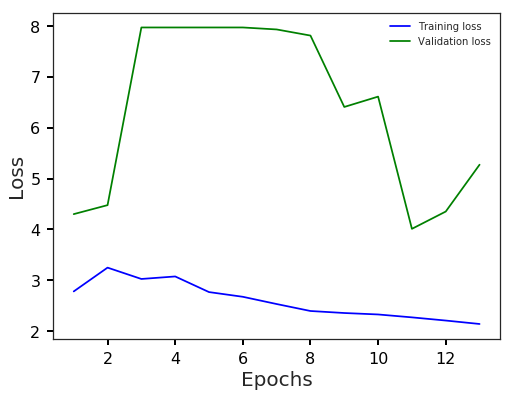

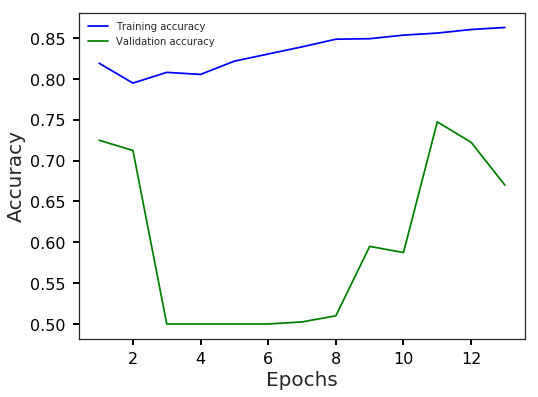

In [66]:
plot_history(history)